# Data Exploration

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# pay=pd.read_csv('paygap.csv')
speed=pd.read_csv('speeddating.csv')
# oscar=pd.read_csv('oscars.csv', encoding = "ISO-8859-1")

In [3]:
# oscar.head()

In [4]:
# pay.head()

In [5]:
speed.head()

has_null  wave     gender   age  age_o  d_age   d_d_age  \
0      b''   1.0  b'female'  21.0   27.0    6.0  b'[4-6]'   
1      b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
2      b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
3      b''   1.0  b'female'  21.0   23.0    2.0  b'[2-3]'   
4      b''   1.0  b'female'  21.0   24.0    3.0  b'[2-3]'   

                                       race  \
0  b'Asian/Pacific Islander/Asian-American'   
1  b'Asian/Pacific Islander/Asian-American'   
2  b'Asian/Pacific Islander/Asian-American'   
3  b'Asian/Pacific Islander/Asian-American'   
4  b'Asian/Pacific Islander/Asian-American'   

                                     race_o samerace  ...  \
0            b'European/Caucasian-American'     b'0'  ...   
1            b'European/Caucasian-American'     b'0'  ...   
2  b'Asian/Pacific Islander/Asian-American'     b'1'  ...   
3            b'European/Caucasian-American'     b'0'  ...   
4               b'Latino/Hispanic American'     b'0'  ...   

   d_expected_num_interested_in_me  d_expected_num_matches like  \
0                         b'[0-3]'                b'[3-5]'  7.0   
1                         b'[0-3]'                b'[3-5]'  7.0   
2                         b'[0-3]'                b'[3-5]'  7.0   
3                         b'[0-3]'                b'[3-5]'  7.0   
4                         b'[0-3]'                b'[3-5]'  6.0   

  guess_prob_liked    d_like  d_guess_prob_liked  met  decision  decision_o  \
0              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'0'   
1              5.0  b'[6-8]'            b'[5-6]'  1.0      b'1'        b'0'   
2              NaN  b'[6-8]'            b'[0-4]'  1.0      b'1'        b'1'   
3              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'1'   
4              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'1'   

   match  
0   b'0'  
1   b'0'  
2   b'1'  
3   b'1'  
4   b'1'  

[5 rows x 123 columns]

could look at religion, race, attractiveness. can also look at correlation between interests (shared interests). dataset includes answers to questionaires about the following:
- (`pref_o`) what my partner looks for
- (`_o`) what my partner rated
- (`_important`) what do i look for in a partner
- (`_partner`) what do i rate my partner
- no added tag --> what do i think of myself

In [6]:
delete_list=list(speed.filter(regex='d_'))

for el in ['shared_interests_important','shared_interests_partner']:
   delete_list.remove(el)

In [7]:
# delete columns which just show the distribution buckets

clean_speed = speed[speed.columns.drop(delete_list)]

# fix match column
clean_speed['match']=clean_speed['match'].str.extract('(\d+)').astype(int)

clean_speed=clean_speed.dropna()
clean_speed=clean_speed.drop(columns='has_null')

/var/folders/5n/08myl3n11bn224bdxw_yfvjr0000gn/T/ipykernel_30819/615110732.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_speed['match']=clean_speed['match'].str.extract('(\d+)').astype(int)


In [8]:
str_df = clean_speed.select_dtypes(exclude=np.number)
str_df

gender                                      race  \
0     b'female'  b'Asian/Pacific Islander/Asian-American'   
1     b'female'  b'Asian/Pacific Islander/Asian-American'   
3     b'female'  b'Asian/Pacific Islander/Asian-American'   
4     b'female'  b'Asian/Pacific Islander/Asian-American'   
5     b'female'  b'Asian/Pacific Islander/Asian-American'   
...         ...                                       ...   
8367    b'male'            b'European/Caucasian-American'   
8368    b'male'            b'European/Caucasian-American'   
8369    b'male'            b'European/Caucasian-American'   
8370    b'male'            b'European/Caucasian-American'   
8377    b'male'            b'European/Caucasian-American'   

                                        race_o samerace                field  \
0               b'European/Caucasian-American'     b'0'               b'Law'   
1               b'European/Caucasian-American'     b'0'               b'Law'   
3               b'European/Caucasian-American'     b'0'               b'Law'   
4                  b'Latino/Hispanic American'     b'0'               b'Law'   
5               b'European/Caucasian-American'     b'0'               b'Law'   
...                                        ...      ...                  ...   
8367                                  b'Other'     b'0'  b'Climate Dynamics'   
8368            b'European/Caucasian-American'     b'1'  b'Climate Dynamics'   
8369            b'European/Caucasian-American'     b'1'  b'Climate Dynamics'   
8370  b'Asian/Pacific Islander/Asian-American'     b'0'  b'Climate Dynamics'   
8377  b'Asian/Pacific Islander/Asian-American'     b'0'  b'Climate Dynamics'   

     decision decision_o  
0        b'1'       b'0'  
1        b'1'       b'0'  
3        b'1'       b'1'  
4        b'1'       b'1'  
5        b'0'       b'1'  
...       ...        ...  
8367     b'0'       b'0'  
8368     b'0'       b'1'  
8369     b'0'       b'1'  
8370     b'0'       b'1'  
8377     b'0'       b'1'  

[6044 rows x 7 columns]

In [9]:
# clean up string
str_df = str_df.apply(lambda x: x.str.split("'").str[1])
str_df = str_df.apply(lambda x: x.str.split("/").str[0])

# change to integer
str_df[['samerace', 'decision', 'decision_o']]=str_df[['samerace', 'decision', 'decision_o']].astype(int)

# set dataframe
clean_speed[['gender', 'race', 'race_o', 'samerace', 'field', 'decision', 'decision_o']]=str_df

In [10]:
clean_speed.columns

Index(['wave', 'gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'field',
       'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
       'pref_o_funny', 'pref_o_ambitious', 'attractive_o', 'sinsere_o',
       'intelligence_o', 'funny_o', 'ambitous_o', 'attractive_important',
       'sincere_important', 'intellicence_important', 'funny_important',
       'ambtition_important', 'shared_interests_important', 'attractive',
       'sincere', 'intelligence', 'funny', 'ambition', 'attractive_partner',
       'sincere_partner', 'intelligence_partner', 'funny_partner',
       'ambition_partner', 'shared_interests_partner', 'sports', 'tvsports',
       'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping',
       'yoga', 'interests_correlate', 'like', 'guess_prob_liked', 'met',
       'decision', 'decision_o', 'match'],
     

In [11]:
clean_speed

wave  gender   age  age_o      race    race_o  samerace  \
0      1.0  female  21.0   27.0     Asian  European         0   
1      1.0  female  21.0   22.0     Asian  European         0   
3      1.0  female  21.0   23.0     Asian  European         0   
4      1.0  female  21.0   24.0     Asian    Latino         0   
5      1.0  female  21.0   25.0     Asian  European         0   
...    ...     ...   ...    ...       ...       ...       ...   
8367  21.0    male  25.0   28.0  European     Other         0   
8368  21.0    male  25.0   26.0  European  European         1   
8369  21.0    male  25.0   22.0  European  European         1   
8370  21.0    male  25.0   27.0  European     Asian         0   
8377  21.0    male  25.0   22.0  European     Asian         0   

      importance_same_race  importance_same_religion             field  ...  \
0                      2.0                       4.0               Law  ...   
1                      2.0                       4.0               Law  ...   
3                      2.0                       4.0               Law  ...   
4                      2.0                       4.0               Law  ...   
5                      2.0                       4.0               Law  ...   
...                    ...                       ...               ...  ...   
8367                   1.0                       1.0  Climate Dynamics  ...   
8368                   1.0                       1.0  Climate Dynamics  ...   
8369                   1.0                       1.0  Climate Dynamics  ...   
8370                   1.0                       1.0  Climate Dynamics  ...   
8377                   1.0                       1.0  Climate Dynamics  ...   

      music  shopping  yoga  interests_correlate  like  guess_prob_liked  met  \
0       9.0       8.0   1.0                 0.14   7.0               6.0  0.0   
1       9.0       8.0   1.0                 0.54   7.0               5.0  1.0   
3       9.0       8.0   1.0                 0.61   7.0               6.0  0.0   
4       9.0       8.0   1.0                 0.21   6.0               6.0  0.0   
5       9.0       8.0   1.0                 0.25   6.0               5.0  0.0   
...     ...       ...   ...                  ...   ...               ...  ...   
8367   10.0       7.0   3.0                 0.37   5.0               5.0  0.0   
8368   10.0       7.0   3.0                 0.27   4.0               5.0  0.0   
8369   10.0       7.0   3.0                 0.45   6.0               3.0  0.0   
8370   10.0       7.0   3.0                 0.35   6.0               6.0  0.0   
8377   10.0       7.0   3.0                 0.01   4.0               5.0  0.0   

      decision  decision_o  match  
0            1           0      0  
1            1           0      0  
3            1           1      1  
4            1           1      1  
5            0           1      0  
...        ...         ...    ...  
8367         0           0      0  
8368         0           1      0  
8369         0           1      0  
8370         0           1      0  
8377         0           1      0  

[6044 rows x 61 columns]

In [12]:
clean_speed.age.value_counts()

27.0    781
23.0    715
24.0    707
26.0    597
25.0    595
28.0    580
22.0    465
30.0    431
29.0    379
21.0    222
32.0    157
34.0    102
33.0     92
31.0     80
35.0     45
20.0     33
42.0     18
38.0     16
36.0     10
18.0      8
19.0      6
55.0      5
Name: age, dtype: int64

In [13]:
clean_speed.race.value_counts()

European    3376
Asian       1496
Latino       454
Other        415
Black        303
Name: race, dtype: int64

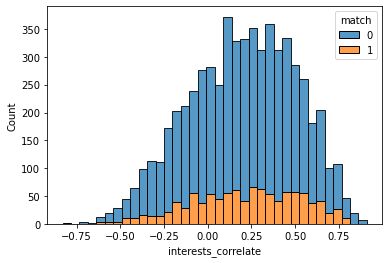

In [14]:
sns.histplot(x='interests_correlate', hue='match',data=clean_speed, multiple="stack")
plt.show()

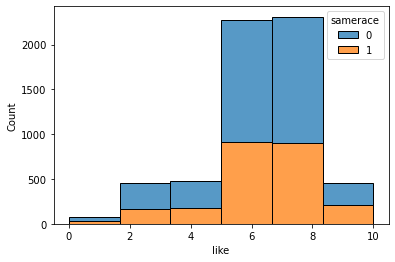

In [15]:
sns.histplot(x='like', hue='samerace', data=clean_speed, multiple="stack", bins=6)
plt.show()

In [16]:
numbers = clean_speed.select_dtypes(include=np.number)

In [17]:
numbers.columns

Index(['wave', 'age', 'age_o', 'samerace', 'importance_same_race',
       'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive', 'sincere', 'intelligence', 'funny', 'ambition',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner',
       'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking',
       'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts',
       'music', 'shopping', 'yoga', 'interests_correlate', 'like',
       'guess_prob_liked', 'met', 'decision', 'decision_o', 'match'],
      dtype='object')

In [18]:
corr_df = numbers[['age', 'age_o', 'samerace', 'importance_same_race', 
       'importance_same_religion', 'pref_o_attractive', 'attractive_o',
                  'attractive_important', 'attractive', 'attractive_partner',
                   'sincere_partner', 'funny_partner',
                  'interests_correlate', 'like', 'guess_prob_liked', 'match']]

In [19]:
corr = corr_df.corr()

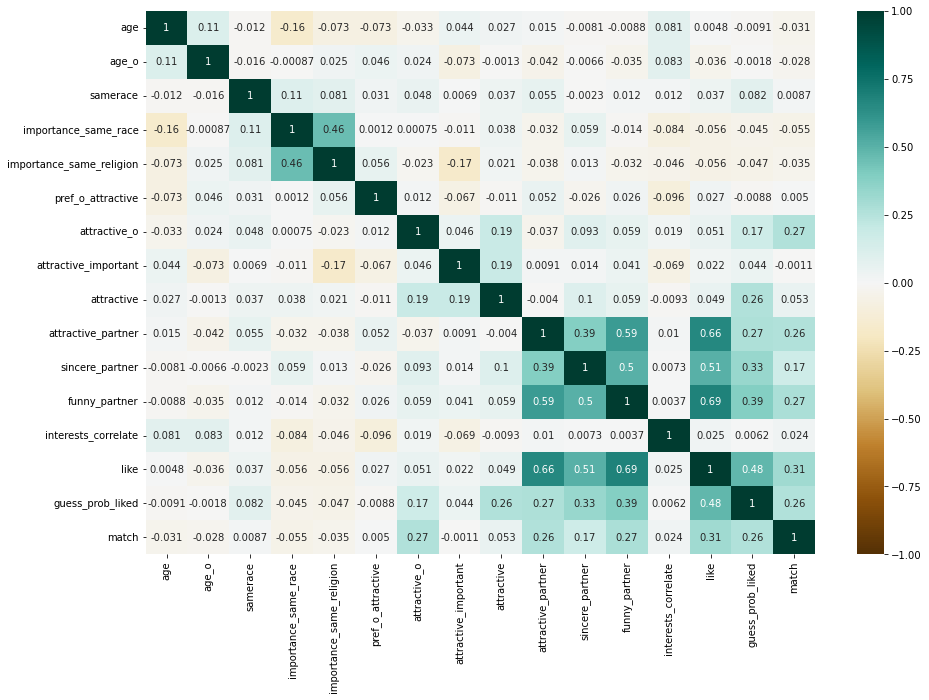

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.show()

Correlation between `like` and `attractive_partner`, `sincere_partner`, `funny_partner` (rating your partner as attractive, sincere, funny). Possible correlation between `importance_same_religion` and `importance_same_race`.

Correlation between `match` and `attractive_o`, `attractive_partner`, and `like`.

## Ideas

- could compare the different values of female and male participants: what is more important for a participant to like their partner--shared interest? attractiveness? same race/religion? sense of humour?
    - users can filter between different participant demographics such as `gender`, `age`, `field`
- could look at how people view themselves vs how their partner views them
    - do participants speak highly of themselves or lowly? 
- We could look at whether race affects values - who they find more attractive? filter by race
    - Could also look whether different age groups prioritise different things - filter by age
**ADD ANY OTHER IDEAS!**

In [21]:
simple = clean_speed.drop(columns=['wave','pref_o_attractive', 'pref_o_sincere',
       'pref_o_intelligence', 'pref_o_funny', 'pref_o_ambitious',
       'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'attractive', 'sincere',
       'intelligence', 'funny', 'ambition', 'sports',
       'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming',
       'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music',
       'shopping', 'yoga', 'interests_correlate', 'guess_prob_liked', 'met', 'decision_o'])
simple

gender   age  age_o      race    race_o  samerace  importance_same_race  \
0     female  21.0   27.0     Asian  European         0                   2.0   
1     female  21.0   22.0     Asian  European         0                   2.0   
3     female  21.0   23.0     Asian  European         0                   2.0   
4     female  21.0   24.0     Asian    Latino         0                   2.0   
5     female  21.0   25.0     Asian  European         0                   2.0   
...      ...   ...    ...       ...       ...       ...                   ...   
8367    male  25.0   28.0  European     Other         0                   1.0   
8368    male  25.0   26.0  European  European         1                   1.0   
8369    male  25.0   22.0  European  European         1                   1.0   
8370    male  25.0   27.0  European     Asian         0                   1.0   
8377    male  25.0   22.0  European     Asian         0                   1.0   

      importance_same_religion             field  attractive_important  ...  \
0                          4.0               Law                  15.0  ...   
1                          4.0               Law                  15.0  ...   
3                          4.0               Law                  15.0  ...   
4                          4.0               Law                  15.0  ...   
5                          4.0               Law                  15.0  ...   
...                        ...               ...                   ...  ...   
8367                       1.0  Climate Dynamics                  70.0  ...   
8368                       1.0  Climate Dynamics                  70.0  ...   
8369                       1.0  Climate Dynamics                  70.0  ...   
8370                       1.0  Climate Dynamics                  70.0  ...   
8377                       1.0  Climate Dynamics                  70.0  ...   

      shared_interests_important  attractive_partner  sincere_partner  \
0                           15.0                 6.0              9.0   
1                           15.0                 7.0              8.0   
3                           15.0                 7.0              6.0   
4                           15.0                 5.0              6.0   
5                           15.0                 4.0              9.0   
...                          ...                 ...              ...   
8367                         0.0                 2.0              7.0   
8368                         0.0                 3.0              4.0   
8369                         0.0                 3.0              3.0   
8370                         0.0                 2.0              7.0   
8377                         0.0                 3.0              7.0   

      intelligence_partner  funny_partner  ambition_partner  \
0                      7.0            7.0               6.0   
1                      7.0            8.0               5.0   
3                      8.0            7.0               6.0   
4                      7.0            7.0               6.0   
5                      7.0            4.0               6.0   
...                    ...            ...               ...   
8367                   6.0            6.0               6.0   
8368                   6.0            4.0               4.0   
8369                   9.0            6.0               9.0   
8370                   9.0            8.0               7.0   
8377                   6.0            4.0               8.0   

      shared_interests_partner  like  decision  match  
0                          5.0   7.0         1      0  
1                          6.0   7.0         1      0  
3                          8.0   7.0         1      1  
4                          6.0   6.0         1      1  
5                          4.0   6.0         0      0  
...                        ...   ...       ...    ...  
8367                       7.0   5.0         0      0  
83

In [22]:
simple.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'field',
       'attractive_important', 'sincere_important', 'intellicence_important',
       'funny_important', 'ambtition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner', 'like',
       'decision', 'match'],
      dtype='object')

In [23]:
simple=simple.rename(columns={'intellicence_important': 'intelligence_important', 'ambtition_important': 'ambition_important'})

In [24]:
# simple['race'] = simple['race'].str.partition('/')[0].astype(str)

# simple.loc[simple["race"] == "European/Caucasian-American", "race"] = "White"
# simple.loc[simple["race"] == "Asian/Pacific Islander/Asian-American", "race"] = "Asian"
# simple.loc[simple["race"] == "Latino/Hispanic American", "race"] = "Latino"
# simple.loc[simple["race"] == "Black/African American", "race"] = "Black"


In [25]:
simple.columns

Index(['gender', 'age', 'age_o', 'race', 'race_o', 'samerace',
       'importance_same_race', 'importance_same_religion', 'field',
       'attractive_important', 'sincere_important', 'intelligence_important',
       'funny_important', 'ambition_important', 'shared_interests_important',
       'attractive_partner', 'sincere_partner', 'intelligence_partner',
       'funny_partner', 'ambition_partner', 'shared_interests_partner', 'like',
       'decision', 'match'],
      dtype='object')

In [26]:
simple

gender   age  age_o      race    race_o  samerace  importance_same_race  \
0     female  21.0   27.0     Asian  European         0                   2.0   
1     female  21.0   22.0     Asian  European         0                   2.0   
3     female  21.0   23.0     Asian  European         0                   2.0   
4     female  21.0   24.0     Asian    Latino         0                   2.0   
5     female  21.0   25.0     Asian  European         0                   2.0   
...      ...   ...    ...       ...       ...       ...                   ...   
8367    male  25.0   28.0  European     Other         0                   1.0   
8368    male  25.0   26.0  European  European         1                   1.0   
8369    male  25.0   22.0  European  European         1                   1.0   
8370    male  25.0   27.0  European     Asian         0                   1.0   
8377    male  25.0   22.0  European     Asian         0                   1.0   

      importance_same_religion             field  attractive_important  ...  \
0                          4.0               Law                  15.0  ...   
1                          4.0               Law                  15.0  ...   
3                          4.0               Law                  15.0  ...   
4                          4.0               Law                  15.0  ...   
5                          4.0               Law                  15.0  ...   
...                        ...               ...                   ...  ...   
8367                       1.0  Climate Dynamics                  70.0  ...   
8368                       1.0  Climate Dynamics                  70.0  ...   
8369                       1.0  Climate Dynamics                  70.0  ...   
8370                       1.0  Climate Dynamics                  70.0  ...   
8377                       1.0  Climate Dynamics                  70.0  ...   

      shared_interests_important  attractive_partner  sincere_partner  \
0                           15.0                 6.0              9.0   
1                           15.0                 7.0              8.0   
3                           15.0                 7.0              6.0   
4                           15.0                 5.0              6.0   
5                           15.0                 4.0              9.0   
...                          ...                 ...              ...   
8367                         0.0                 2.0              7.0   
8368                         0.0                 3.0              4.0   
8369                         0.0                 3.0              3.0   
8370                         0.0                 2.0              7.0   
8377                         0.0                 3.0              7.0   

      intelligence_partner  funny_partner  ambition_partner  \
0                      7.0            7.0               6.0   
1                      7.0            8.0               5.0   
3                      8.0            7.0               6.0   
4                      7.0            7.0               6.0   
5                      7.0            4.0               6.0   
...                    ...            ...               ...   
8367                   6.0            6.0               6.0   
8368                   6.0            4.0               4.0   
8369                   9.0            6.0               9.0   
8370                   9.0            8.0               7.0   
8377                   6.0            4.0               8.0   

      shared_interests_partner  like  decision  match  
0                          5.0   7.0         1      0  
1                          6.0   7.0         1      0  
3                          8.0   7.0         1      1  
4                          6.0   6.0         1      1  
5                          4.0   6.0         0      0  
...                        ...   ...       ...    ...  
8367                       7.0   5.0         0      0  
83

In [27]:
simple.to_csv('clean_speeddating.csv')

In [28]:
corr.to_csv("correlations.csv")

In [29]:
like_df = numbers[['like','attractive_important', 'intellicence_important', 'funny_important', 'ambtition_important', 'sincere_important', 'shared_interests_important']]

In [30]:
correlations = like_df.corr()


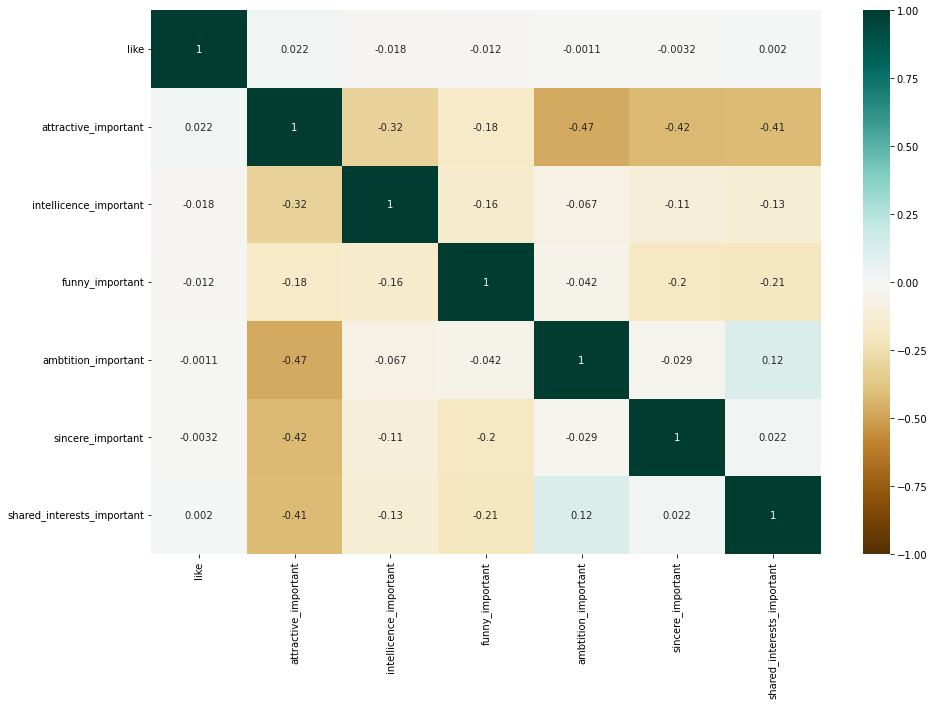

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(data=correlations, vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.show()